# Sales forecasting

### Walkthrough of a Data Science Project

- Step 1: Understanding the Challenge
- Step 2: Understanding the Area/Company
- Step 3: Extraction / Obtaining Data
- Step 4: Data Adjustment (Treatment/Cleaning)
- Step 5: Exploratory Analysis
- Step 6: Modeling + Algorithms (This is where Artificial Intelligence comes in, if necessary)
- Step 7: Interpretation of Results

#Understanding the business problem

The business problem is to be able to predict the sales that we are going to have in a given period based on spending on ads in the 3 major networks that the company Hashtag invests in: TV, Newspapers and Radio

Method: Linear regression

## Importing Libraries 

In [ ]:
pip install sweetviz

In [48]:
# Data analysis library
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import sweetviz as sv

#Machine Learning library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Model evaluation library
from sklearn.metrics import r2_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Data collection

- 
A data professional extracted the data directly from the Database and provided a dataset in .csv format containing the observations made by the marketing team.

In [4]:
# Creating dataframe
df = pd.read_csv("/content/vendas_marketing.csv")

## Undestanding the dataset

In [5]:
# Visualizing the first 5 rows and last 5 rows
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
# Dataset dimensionality
rows, columns = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 200
Number of columns: 4


In [7]:
# Dataset Summary: Datatypes and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Attributes names - data types**

- TV - Float
- Radio (Gender) - Float
- Newspaper - Float
- Sales - Float

In [8]:
# First statistical description of the Dataset
df.describe().round(2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


## Data cleaning

In [9]:
# Find duplicates
df.duplicated().sum()

0

In [10]:
# Find null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
# Find NaN values
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
df['Total']=df.iloc[:,0:3].sum(axis=1)

In [13]:
df.head()

,TV,Radio,Newspaper,Sales,Total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


## Exploratory Data Analysis (EDA)

### Univariate analysis

Numerical variables


**TV**

In [14]:
# Unique values
df["TV"].nunique()

190

In [15]:
#Statistical description of the investment in TV
df["TV"].describe().round(2)

count    200.00
mean     147.04
std       85.85
min        0.70
25%       74.38
50%      149.75
75%      218.82
max      296.40
Name: TV, dtype: float64

In [16]:
#Kurtosis of the TV investment distribution
#Asymmetry of the TV investment distribution
print(f"Curtose: {df['TV'].kurt()}")
print(f"Assimetria: {df['TV'].skew()}")

Curtose: -1.2264948242299691
Assimetria: -0.06985336213274573


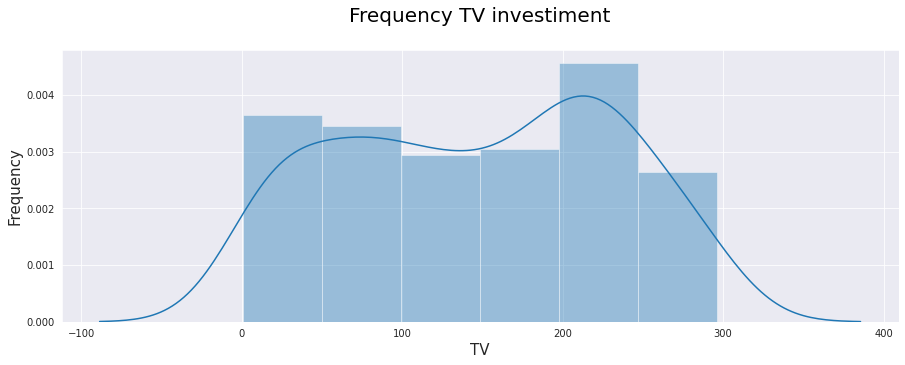

In [17]:
#Frequency of TV investments
plt.figure(figsize=(15, 5))
plt.title("Frequency TV investiment\n", fontsize=20, color='black')
plt.xlabel("TV", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
sns.distplot(df["TV"])
plt.show()

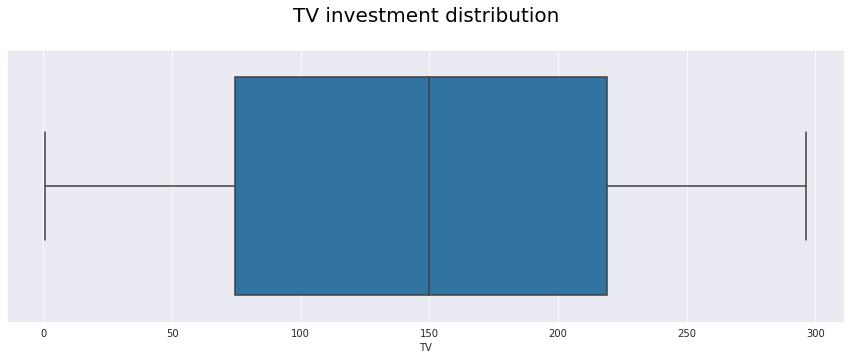

In [18]:
#Boxplot visualization
plt.figure(figsize=(15, 5))
plt.title("TV investment distribution\n", fontsize=20, color='black')
sns.boxplot(data= df, x= "TV")
plt.show()

**Radio**

In [19]:
# Unique values
df["Radio"].nunique()

167

In [20]:
#Statistical description of the investment in Radio
df["Radio"].describe().round(2)

count    200.00
mean      23.26
std       14.85
min        0.00
25%        9.98
50%       22.90
75%       36.52
max       49.60
Name: Radio, dtype: float64

In [21]:
#Kurtosis of the Radio investment distribution
#Asymmetry of the Radio investment distribution
print(f"Curtose: {df['Radio'].kurt()}")
print(f"Assimetria: {df['Radio'].skew()}")

Curtose: -1.2604014033120108
Assimetria: 0.09417463149664404


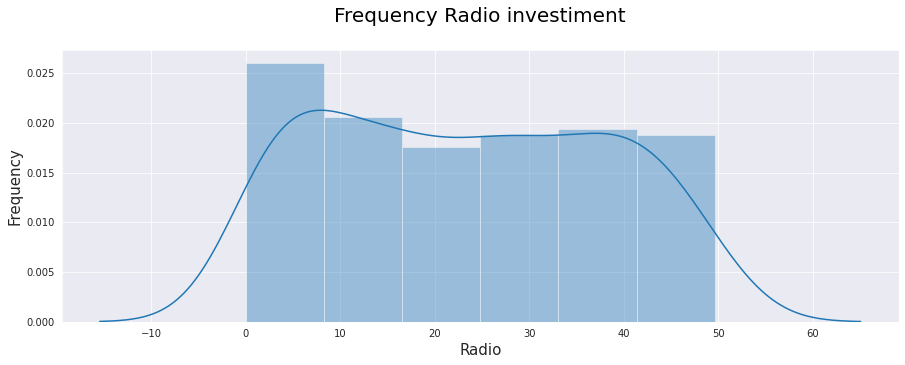

In [22]:
#Frequency of Radio investments
plt.figure(figsize=(15, 5))
plt.title("Frequency Radio investiment\n", fontsize=20, color='black')
plt.xlabel("Radio ($)", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
sns.distplot(df["Radio"])
plt.show()

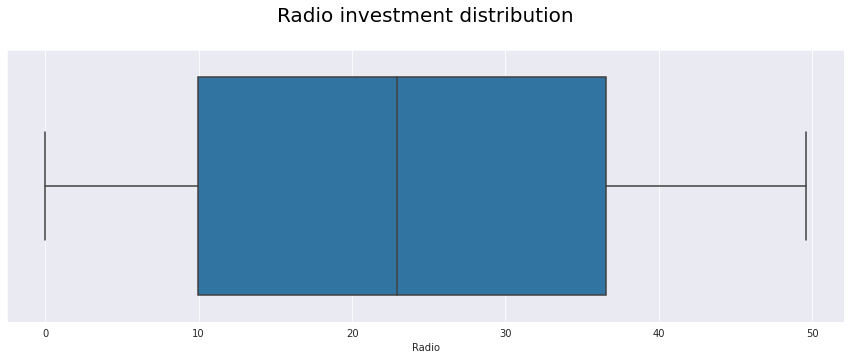

In [23]:
#Boxplot visualization
plt.figure(figsize=(15, 5))
plt.title("Radio investment distribution\n", fontsize=20, color='black')
sns.boxplot(data= df, x= "Radio")
plt.show()

**Newspaper**

In [24]:
# Unique values
df["Newspaper"].nunique()

172

In [25]:
#Statistical description of the investment in Newspaper
df["Newspaper"].describe().round(2)

count    200.00
mean      30.55
std       21.78
min        0.30
25%       12.75
50%       25.75
75%       45.10
max      114.00
Name: Newspaper, dtype: float64

In [26]:
#Kurtosis of the Newspaper investment distribution
#Asymmetry of the Newspaper investment distribution
print(f"Curtose: {df['Newspaper'].kurt()}")
print(f"Assimetria: {df['Newspaper'].skew()}")

Curtose: 0.6495019091381007
Assimetria: 0.8947204074986175


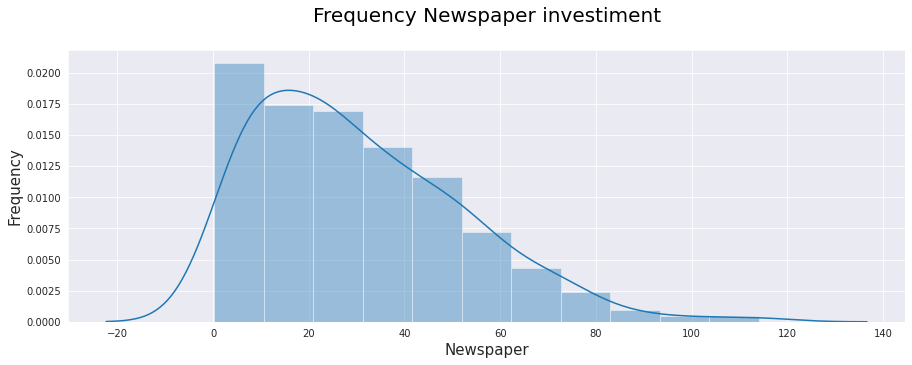

In [27]:
#Frequency of Newspaper investments
plt.figure(figsize=(15, 5))
plt.title("Frequency Newspaper investiment\n", fontsize=20, color='black')
plt.xlabel("Newspaper ($)", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
sns.distplot(df["Newspaper"])
plt.show()

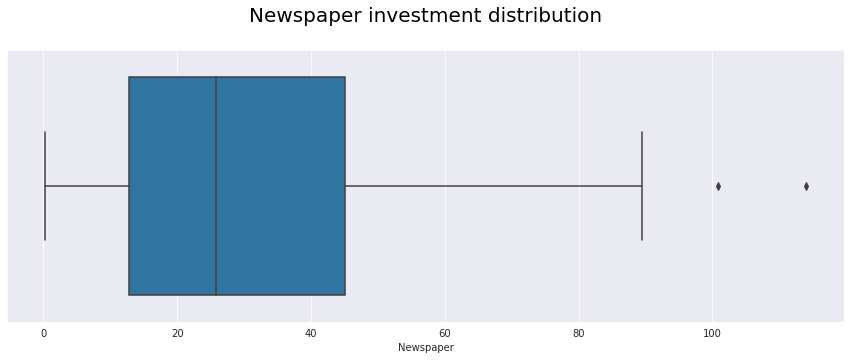

In [28]:
#Boxplot visualization
plt.figure(figsize=(15, 5))
plt.title("Newspaper investment distribution\n", fontsize=20, color='black')
sns.boxplot(data= df, x= "Newspaper")
plt.show()

**Complete Visualization**

In [29]:
my_vis= sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [30]:
my_vis.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Bivariate analysis

Comparing distributions


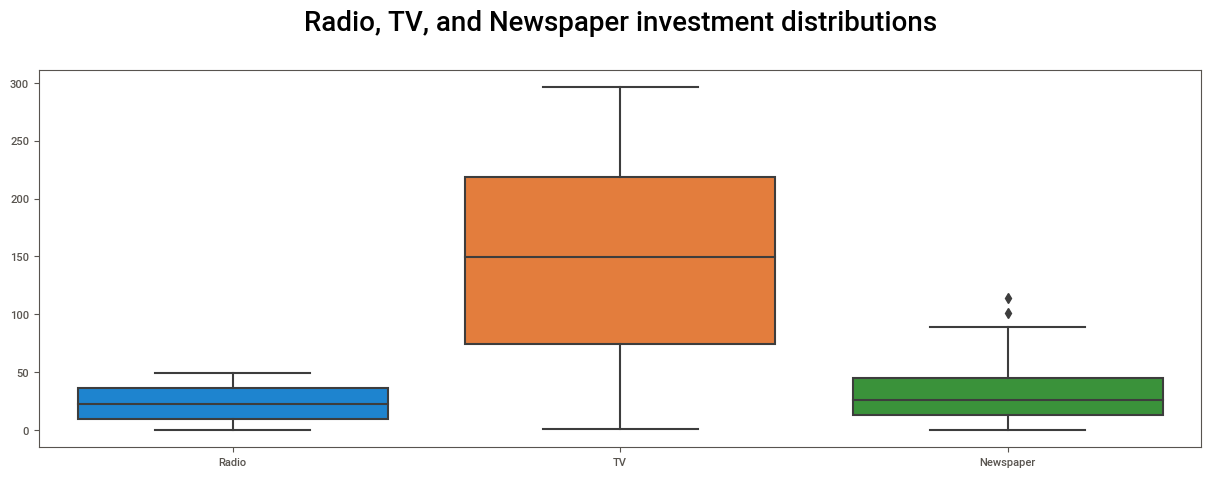

In [31]:
#Boxplot visualization
plt.figure(figsize=(15, 5))
plt.title("Radio, TV, and Newspaper investment distributions\n", fontsize=20, color='black')
sns.boxplot(data= df[["Radio", "TV", "Newspaper"]])
plt.show()

**Correlation**

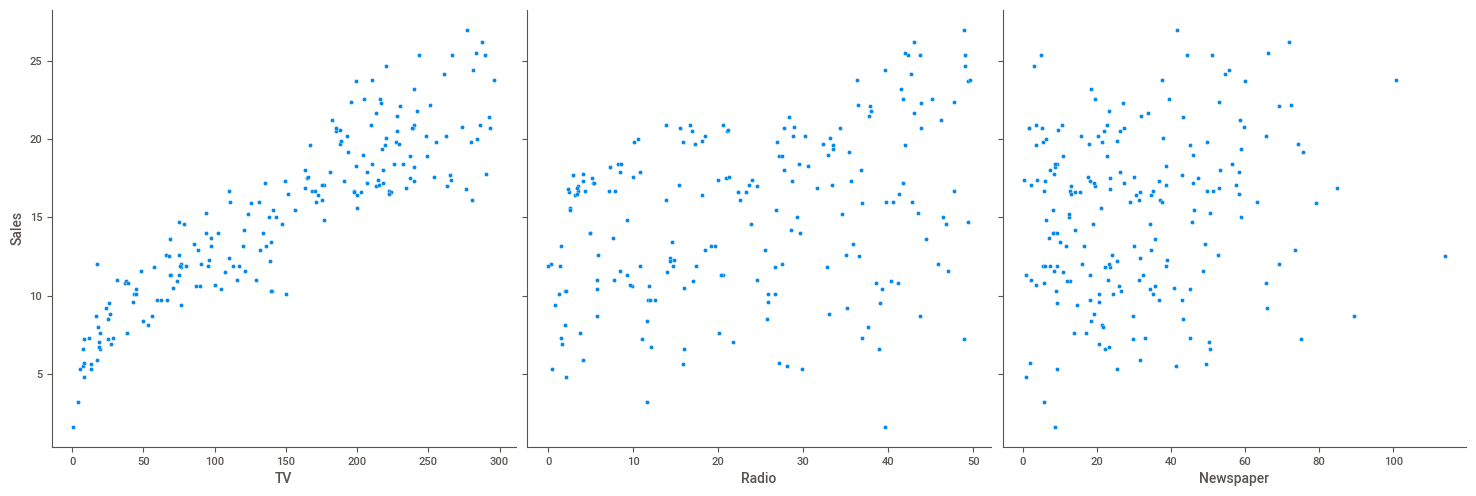

In [32]:
# Scatterplot
sns.pairplot(data= df, x_vars= ["TV", "Radio", "Newspaper"], y_vars= "Sales", height= 5, aspect= 1, kind= 'scatter')
plt.show()

Pearson's correlation coefficient between continuous numerical attributes

In [33]:
df[["TV", "Radio", "Newspaper", "Sales"]].corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


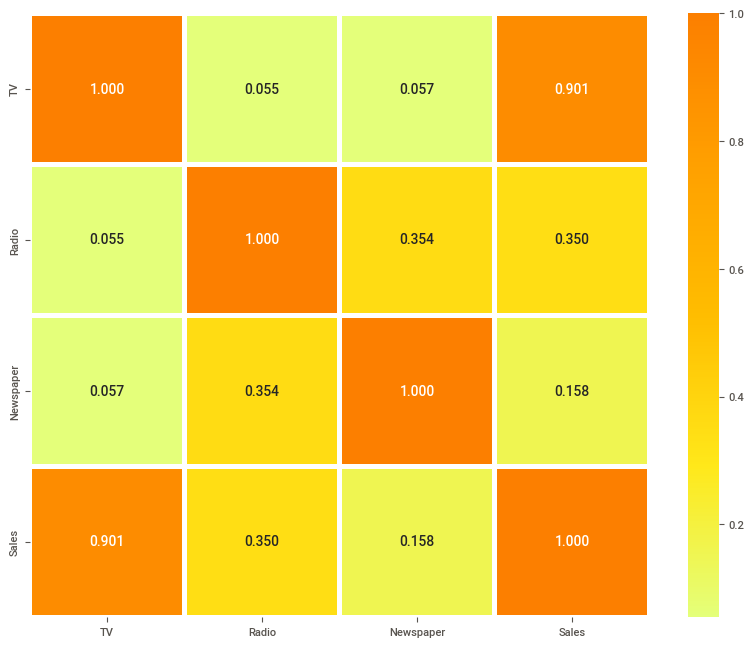

In [34]:
# Visualizing Pearson's correlation coefficient
plt.figure(figsize=(10,8))
sns.heatmap(df[["TV", "Radio", "Newspaper", "Sales"]].corr(), annot=True, cmap="Wistia", linewidth=3, fmt=".3f")
plt.show()

Strong positiv correlation between TV investment and Sales. The greater the investment in TV, the greater the value of sales.
The investment in TV has a huge influence/impact in Sales.

# Linear Regression model (Machine Learning)

- First prediction: Predicting sales only with TV data and using a Linear Regression model.

- Second prediction: Predicting sales with TV, Radio, and Newspaper data and avaluate the results of two regression models: Linear Regression vs. Random Forest

### First prediction

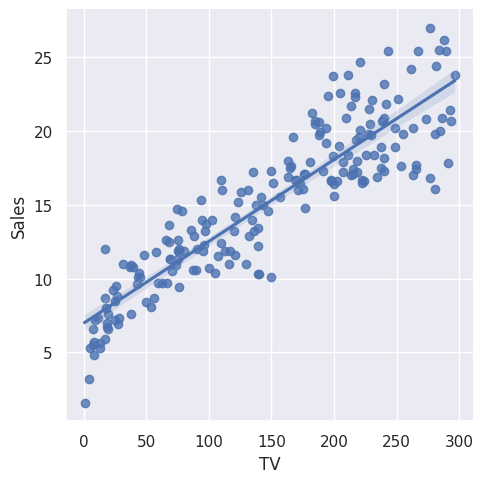

In [35]:
#Firt visualization of a linear regression using seaborn
sns.set(color_codes=True)
sns.lmplot(data= df, x= "TV", y= "Sales")

In [36]:
#Defining the X variable as the values invested in TV
X = df[["TV"]]

In [37]:
#Definig the y variable as the target (Sales values)
y = df[["Sales"]]

Defining the train and test values for the X and y variables.
- Train: 80% of the Dataset
- Test: 20% of the Dataset

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=100)

In [39]:
#Applying the Linear Regression function to the reg variable
reg = LinearRegression()

In [40]:
reg.fit(X_train, y_train)

LinearRegression()

In [41]:
pred = reg.predict(X_test)

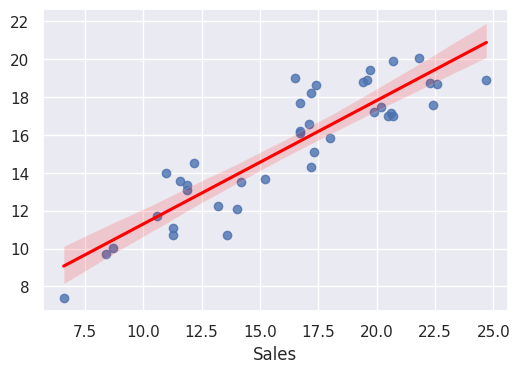

In [42]:
sns.regplot(y_test, pred, line_kws= {"color": "red"})

In [43]:
r2 = r2_score(y_test, pred)

In [44]:
#Acertividade
print(r2)

0.7281352744078883


Prediction

In [47]:
tv_investment_value = float(input("Amount invested in TV: "))

Amount invested in TV: 25


In [46]:
reg.predict([[tv_investment_value]]).round(2)

array([[8.19]])

## Second prediction
- Linear Regression vs. Random Forest

Assigning the data into X1 and y1 variables

In [53]:
#Defining the X1 variable as the values invested in TV, Radio, and Newspaper
X1 = df.drop(["Sales", "Total"], axis=1)

In [54]:
X1.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [55]:
#Definig the y1 variable as the target (Sales values)
y1 = df[["Sales"]]

In [57]:
y1.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


Spliting the data into train and test

In [58]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, train_size=0.7, random_state=1)

### Since we have a regression problem, two models will be evaluated:
- Linear Regression
- Random Forest

In [61]:
#Assigning the two models to distinct variables
linearregression_model = LinearRegression()
randomforest_model = RandomForestRegressor()

In [62]:
#Fitting the data
linearregression_model.fit(X1_train, y1_train)
randomforest_model.fit(X1_train, y1_train)

RandomForestRegressor()

### Creating the predictions

In [63]:
prediction_linearregression = linearregression_model.predict(X1_test)
prediction_randomforest = randomforest_model.predict(X1_test)

### Evaluating the best model
- Using R²: it evaluates, in terms of percentage, how well the model explains the context.

In [64]:
from sklearn import metrics

print(f"R² Linear Regression: {metrics.r2_score(y1_test, prediction_linearregression)}")
print(f"R² Random Forest: {metrics.r2_score(y1_test, prediction_randomforest)}")

R² Linear Regression: 0.9071151423684273
R² Random Forest: 0.9630166107901894


### Visualizing the predictions
- Comparing y1_test with prediction_linearregression and prediction_randomforest

In [74]:
#Creating a auxiliar DataFrame with y1_test, prection_linearregression, and prediction_randomforest
vis_table = pd.DataFrame()
vis_table["y1_test"] = y1_test
vis_table["Prediction_LinearRegression"] = prediction_linearregression
vis_table["Prediction_RandomForest"] = prediction_randomforest

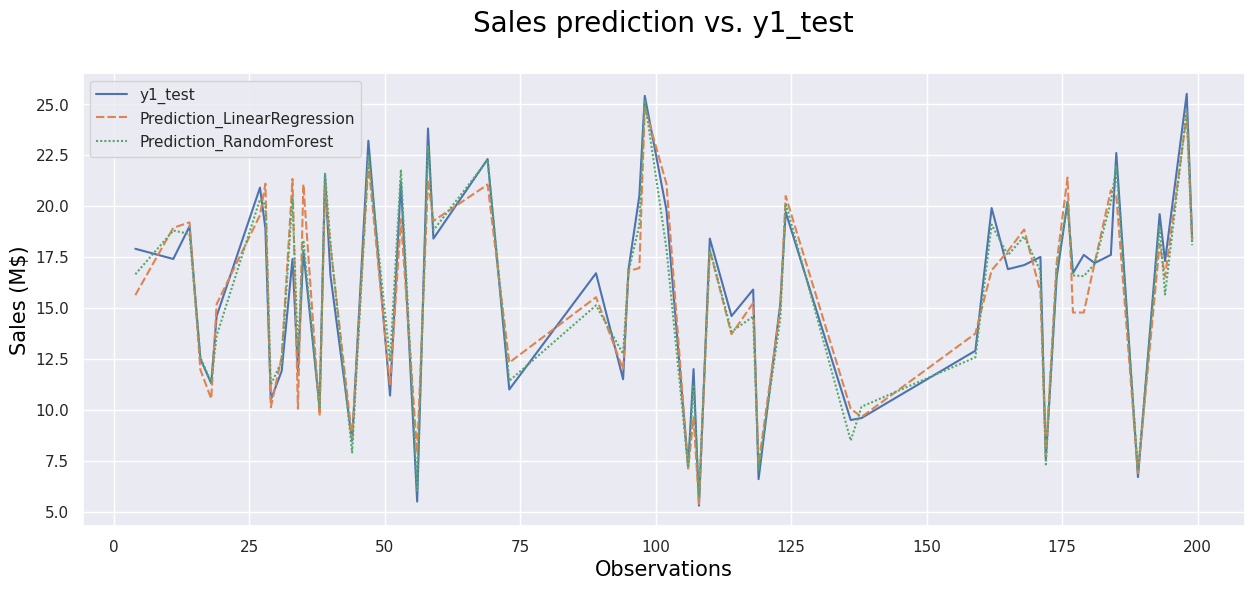

In [75]:
plt.figure(figsize=(15,6))
plt.title("Sales prediction vs. y1_test\n ", fontsize= 20, color="black")
plt.ylabel("Sales (M$)", fontsize= 15, color="black")
plt.xlabel("Observations", fontsize= 15, color="black")
sns.lineplot(data=vis_table)

plt.show()